# Laboratório de Estatística 1

## Educação Superior - Subgrupo 1

Componentes:
* Ailton Patrício dos Santos Júnior - 180011618
* Juliana Magalhães Rosa - 180020935
* Lucas Loureiro Lino da Costa - 190016566

## Pacotes e WD

In [1]:
# Carregando os pacotes:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
from tabulate import tabulate
import os
import re

# Pacote para conversão de caracteres UNICODE e ASCII:
!pip install unidecode
import unidecode

# Carregando o google Drive a API
from google.colab import drive
drive.mount('/content/drive')

# Configurando o working directory:
wd = "/content/drive/MyDrive/Datasets"

os.chdir(wd)

     |████████████████████████████████| 235 kB 10.1 MB/s 
Mounted at /content/drive


## Carregando os DBs,  conferindo integridade,  padronizações e unificação dos dados 

In [18]:
# Filtrando somente os arquivos csv do nosso WD a serem usados:
file = []
for item in os.listdir():
    if item.endswith(".csv"):
        file.append(item)
file.sort()
        
# Importando os arquivos csv como DB do Pandas:
db_sigra = pd.read_csv(file[1],sep = ",")
db_sigaa = pd.read_csv(file[0],sep = ",")


# Conferindo entradas duplicadas, para ambos os DBs:
# Como os dois objetos tem a mesma extenção, não temos duplicatas
# para ambos os casos
print(len(db_sigra) == \
      len(db_sigra[~db_sigra.duplicated()\
                   .groupby(db_sigra['Matrícula']).transform('any')]))
print(len(db_sigra))


print(len(db_sigaa) == \
      len(db_sigaa[~db_sigaa.duplicated()\
                   .groupby(db_sigaa['Matrícula']).transform('any')]))
print(len(db_sigaa))

True
380426
True
11375


In [19]:
# Removendo acentos dos nomes das colunas e
# colocando os mesmos em maiúsculo para ambos os DBs:
db_sigra.columns = db_sigra.columns.str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')\
       .str.upper()

db_sigaa.columns = db_sigaa.columns.str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')\
       .str.upper()

In [20]:
# Renomeando a coluna SEMESTRE em db_sigra para ter o mesmo nome que em db_sigaa: 
db_sigra = db_sigra.rename({'SEMESTRE EM QUE CURSOU A DISCIPLINA': 'SEMESTRE'}\
                           , axis=1)

In [21]:
# Removendo acentos  e colocando todas as entradas em maísculo de ambos os DBs:
db_sigaa = db_sigaa.astype(str)
db_sigra = db_sigra.astype(str)
for column in list(db_sigaa.columns):
  db_sigaa[column] = db_sigaa[column].apply(unidecode.unidecode)
  db_sigaa[column] = db_sigaa[column].apply(str.upper)

for column in list(db_sigra.columns):
  db_sigra[column] = db_sigra[column].apply(unidecode.unidecode)
  db_sigra[column] = db_sigra[column].apply(str.upper)


In [22]:
# Padronizando os nomes das disciplinas:
nomes_disciplinas = []
for cod in db_sigra["COD. DISCIPLINA"].unique():
  nomes_disciplinas.append(\
                           db_sigra[db_sigra["COD. DISCIPLINA"] == cod]\
                           ["DISCIPLINA"].unique()[0])
  

nomes_cod_disciplinas = []
for i in range(len(db_sigra["COD. DISCIPLINA"].unique())):
  nomes_cod_disciplinas.append(\
                               (nomes_disciplinas[i],\
                                db_sigra["COD. DISCIPLINA"].unique()[i]))

for i in range(len(db_sigra)):
  for x in range(len(nomes_cod_disciplinas)):
    if db_sigra['COD. DISCIPLINA'][i] in nomes_disciplinas[x][1]:
      db_sigra["DISCIPLINA"][i] = nomes_cod_disciplinas[x][0]

In [23]:
# lista disciplinas da estatística:
disciplinas_estatistica = ['ESTATISTICA APLICADA', 'PROBABILIDADE E ESTATISTICA',
       'METODOS ESTATISTICOS 1', 'BIOESTATISTICA',
       'INTRODUCAO A PROBABILIDADE', 'INFERENCIA ESTATISTICA',
       'ESTATISTICA EXPLORATORIA 1', 'CONTROLE ESTATISTICO DE QUALIDADE',
       'DEMOGRAFIA', 'APLICACOES DA ESTATISTICA 1',
       'ESTAGIO SUPERVISIONADO EM ESTATISTICA 1',
       'TECNICAS DE AMOSTRAGEM', 'PLANEJAMENTO E PESQUISA 1',
       'PLANEJAMENTO E PESQUISA 2', 'ANALISE DAS SERIES TEMPORAIS',
       'PESQUISA OPERACIONAL 1', 'ANALISE MULTIVARIADA 2',
       'METODOS ESTATISTICOS 2',
       'ESTAGIO SUPERVISIONADO EM ESTATISTICA 2',
       'PESQUISA OPERACIONAL 2', 'MEDIDAS DE INFORMACAO E APLICACOES',
       'PROCESSOS ESTOCASTICOS', 'APLICACOES DA ESTATISTICA 2',
       'ANALISE DE DADOS CATEGORIZADOS',
       'INTRODUCAO A ANALISE DE SOBREVIVENCIA',
       'COMPUTACAO EM ESTATISTICA 1',
       'DELINEAMENTO E ANALISE DE EXPERIMENTOS 2',
       'TRABALHO DE CONCLUSAO DE CURSO 2', 'ANALISE DE SOBREVIVENCIA',
       'METODOS APLICADOS', 'DELINEAMENTO E ANALISE DE EXPERIMENTOS',
       'ANALISE MULTIVARIADA 1', 'ANALISE DE SERIES TEMPORAIS',
       'TRABALHO DE CONCLUSAO DE CURSO 1', 'ESTATISTICA EXPLORATORIA',
       'TOPICOS EM ESTATISTICA 2', 'COMPUTACAO EM ESTATISTICA 2',
       'ESTATISTICA COMPUTACIONAL', 'TOPICOS EM ESTATISTICA 1',
       'INFERENCIA BAYESIANA', 'CONSULTORIA',
       'TEORIA DA RESPOSTA AO ITEM', 'LABORATORIO DE ESTATISTICA 1',
       'MODELOS LINEARES GENERALIZADOS', 'ESTATISTICA ESPACIAL',
       'HISTORIA DA ESTATISTICA', 'PROBABILIDADE E ESTATISTICA 2',
       'ANALISE DE SERIES TEMPORAIS 2', "LABORATORIO DE ESTATISTICA 2",
        "ESTATISTICA EXPLORATORIA 2", "ANALISE DE REGRESSAO LINEAR"]

# lista do semestre correspondente ao cod. disiciplina da estatística:
# Para aquelas disciplinas de serviço do departamento, usaremos a nomenclatura
# 0, já que elas não fazem parte do ciclo de obrigatórias da graduação
disciplinas_estatistica_semestre = [0, 0, 2, 0, 1, 4, 1, 0, 4, 0, 0, 4, 0, 0, 6,
                                    4, 0, 3, 0, 0, 0, 5, 0, 6, 0, 1, 0, 8, 0, 0,
                                    5, 6, 6, 7,1, 0, 2, 5, 0, 6, 0, 0, 0, 0, 0,
                                    0, 0, 0, 0, 0, 5]

# lista disciplinas da matemática:
disciplinas_matematica = []

for i in range(len(db_sigra["DISCIPLINA"].unique())):
  if db_sigra["DISCIPLINA"].unique()[i] in disciplinas_estatistica:
    pass
  else:
    disciplinas_matematica.append(db_sigra["DISCIPLINA"].unique()[i])

for i in range(len(db_sigaa["DISCIPLINA"].unique())):
  if db_sigaa["DISCIPLINA"].unique()[i] in disciplinas_estatistica \
      or db_sigaa["DISCIPLINA"].unique()[i] in disciplinas_matematica:
    pass
  else:
    disciplinas_matematica.append(db_sigra["DISCIPLINA"].unique()[i])

# lista do semestre correspondente ao cod. disiciplina da matemática:
# Para aquelas disciplinas optativas da MAT, usarei a nomenclatura
# 0, já que elas não fazem parte do ciclo de obrigatórias da graduação
disciplinas_matematica_semestre = [2, 3, 3, 1, 2, 4, 3]


# Criando nova lista, com as listas unificadas da MAT e EST:
disciplinas = disciplinas_matematica + disciplinas_estatistica
disciplinas_semestre = disciplinas_matematica_semestre + disciplinas_estatistica_semestre

In [24]:
# Unificando os DBs em um único:
# Como os períodos dos dois DBs são diferentes, vamos apenas concatenar os dados
# respeitando a série temporal (sendo assim, não temos duplicatas)
db = pd.concat([db_sigra, db_sigaa],ignore_index=True, sort=False)


# Retirando as colunas não necessárias:
db = db.drop(["COD. DISCIPLINA", "HORA INICIO", "HORA FIM", "FALTAS", "HORARIO",
             "FREQUENCIA"], axis=1)

# Unificando o nome da disciplina ANALISE DE SERIES TEMPORAIS:
for i in range(len(db)):
  if db.DISCIPLINA.iloc[i] == "ANALISE DAS SERIES TEMPORAIS":
    db.DISCIPLINA.iloc[i] = "ANALISE DE SERIES TEMPORAIS"

In [25]:
# Removendo as entradas duplicadas de matérias cursadas no mesmo período
# pelo mesmo aluno, provavelmente fruto de transferência interna ou dupla habilitação
# ou algo do tipo (cursos diferentes):
db = db.drop_duplicates(subset=["NOME", "DISCIPLINA", "SEMESTRE" ], keep='last')

# Usando o NOME como indexador:
db = db.set_index("NOME")

## Criação de variáveis adicionais ao DB unificado

In [31]:
# Criando variável OFERTANTE, baseado em qual departamento ministra
# a disciplina:
departamento = []
for i in range(len(db)):
  if db["DISCIPLINA"][i] in disciplinas_estatistica:
    departamento.append("EST")
  else:
    departamento.append("MAT")
db["OFERTANTE"] = departamento

In [32]:
# Criando variável SEMESTRE FLUXO, baseado no fluxo da disciplina:
# Vide sessão acima, para mais informações.
variavel_fluxo = []
for i in range(len(db)):
  for j in range(len(disciplinas)):
    if db["DISCIPLINA"][i]==disciplinas[j]:
      variavel_fluxo.append(disciplinas_semestre[j])
      break
db["SEMESTRE FLUXO"] = variavel_fluxo

In [33]:
# Separando a variável SEMESTRE em ANO e PERIODO_ANO:

ANO = []
PERIODO_ANO = []

for i in range(len(db)):
  m = re.split("([0-9]{1})$", db.SEMESTRE.iloc[i])
  ANO.append(int(m[0]))
  PERIODO_ANO.append(int(m[1]))

db["ANO"] = ANO
db["PERIODO_ANO"] = PERIODO_ANO

In [39]:
# Criando variável referente ao ano de entrada e de saída de cada aluno:
alunos = list(db.index.unique())
ano_entrada = []
ano_saida = []
for aluno in alunos:
  ano_entrada.append(min(list(db[db.index == aluno]["ANO"])))
  ano_saida.append(max(list(db[db.index == aluno]["ANO"])))


db = db.merge(pd.DataFrame(data = {"NOME" : alunos,
                                      "ANO_ENTRADA" : ano_entrada,
                                      "ANO_SAIDA" : ano_saida}),
               on="NOME", how = "left")

In [40]:
# criando variável APROVACAO no db, baseado na menção do aluno:
conditions = [
  (db["MENCAO"] == "SS"),
  (db["MENCAO"] == "MS"),
  (db["MENCAO"] == "MM"),
  (db["MENCAO"] == "MI"),
  (db["MENCAO"] == "II"),
  (db["MENCAO"] == "SR"),
  (db["MENCAO"] == "TR"), # tranacamento
  (db["MENCAO"] == "TJ"), # trancamento justificado
  (db["MENCAO"] == "AP"), # aprovado por média
  (db["MENCAO"] == "CC"), # concessão de crédito
  (db["MENCAO"] == "DP"), # dispensado
  (db["MENCAO"] == "NAN") # considerando como Not A Number
]

values = ["SIM", "SIM", "SIM",
          "NAO", "NAO","NAO",
          "NAO_APLICAVEL","NAO_APLICAVEL", "SIM",
          "NAO_APLICAVEL", "NAO_APLICAVEL", "NAO_APLICAVEL"]

db["APROVACAO"] = np.select(conditions, values)


# Usando o NOME como indexador:
db = db.set_index("NOME")

In [38]:
# Caso queiram simplesmente criar um arquivo csv com os dados limpos e
# as variáveis criadas, usem a opção abaixo (mais rápido,
# pois não precisa rodar essa sessão novamente, somente carregar o DB):


# ficará disponível no WD configurado na sessão 1 para download assim como no Drive,
# o nome ficou assim para não dar conflito com a leitura dos outros DBs
db.to_csv("w_dados_limpos.csv")


In [41]:
db.head(18)

,MATRICULA,CURSO,DISCIPLINA,SEMESTRE,PROFESSOR,TURMA,MENCAO,OFERTANTE,SEMESTRE FLUXO,ANO,PERIODO_ANO,ANO_ENTRADA,ANO_SAIDA,APROVACAO
NOME,,,,,,,,,,,,,,
GHJARFSGMOJFQNGT,^!#@6@$,BIBLIOTECONOMIA,ESTATISTICA APLICADA,19941,PUYKFGTZUTOUFIGXXOPUFHGXHUYG,C,SS,EST,0,1994,1,1994,1994,SIM
GHKRFXOIGXJUFVOSKTZGFLKXXKZZOFJGFIUYZG,^986$7$,MATEMATICA,CALCULO 2,19941,RAOFFJKFUROBKOXGFGSUXOS,E,MM,MAT,2,1994,1,1994,1995,SIM
GHKRFXOIGXJUFVOSKTZGFLKXXKZZOFJGFIUYZG,^986$7$,MATEMATICA,PROBABILIDADE E ESTATISTICA,19941,UZGBOUFYOSUKYFHGXHUYGFLORNU,D,II,EST,0,1994,1,1994,1995,NAO
GHTKXFROSGFJKFUROBKOXG,^96!6^#,ENGENHARIA CIVIL,CALCULO 3,19941,PUYKFGRLXKJUFYORBG,C,SS,MAT,3,1994,1,1994,1994,SIM
GIOBGRFRUVKYFSUTZKOXU,^87^6%7,ENGENHARIA CIVIL,CALCULO 3,19941,PUYKFGRLXKJUFYORBG,C,II,MAT,3,1994,1,1994,1995,NAO
GIOBGRFRUVKYFSUTZKOXU,^87^6%7,ENGENHARIA CIVIL,CALCULO NUMERICO,19941,NGEJKKF2KXTKIQFVUAHKR,C,MI,MAT,3,1994,1,1994,1995,NAO
GJGOXFJUYFYGTZUYFTGFGXKZNFPATOUX,^!6!%87,ENGENHARIA MECANICA,CALCULO 1,19941,NKRJKXFJKFIGXBGRNUFSGZUY,F,MM,MAT,1,1994,1,1994,1998,SIM
GJGRHKXZUFJGTZGYFMUTIGRBKY,^!79^#7,ENGENHARIA ELETRICA,CALCULO 1,19941,XAJURLFXOINGXJFSGOKX,A,MI,MAT,1,1994,1,1994,1998,NAO
GJGRHKXZUFJKFPKYAYFNKXTGTJKFFNKXTGTJKF,^9#66$$,CIENCIAS ECONOMICAS,CALCULO 2,19941,XUJXOMUFGTJXKYFJKFYUAFGFVKTGRUFG,F,TR,MAT,2,1994,1,1994,1994,NAO_APLICAVEL


## Início da Análise

### 1.Qual é o número médio de vezes que é necessário fazer uma matéria para passar nela? 

Variáveis de interesse: nome do estudante, disciplina, menção, período. 

Método: Fazer média para cada disciplina (focar nas que tem maior índice de reprovação) e também média geral. 

Obs.: criar variável de aprovação (sim ou não). 

In [ ]:
# Criando um novo DB contendo a variável número de vezes cursas de cada disciplina
# por aluno e por status de aprovação:
db_1 = db.copy()
db_1 = db_1.reset_index()
db_1 = db_1.groupby(["NOME", "APROVACAO", "DISCIPLINA"]).size().reset_index(name='VEZES_POR_APROVACAO')                                                    
db_1 = db_1.rename({"CURSO" : "VEZES"}, axis= 1)

In [ ]:
# Criando um novo DB contendo a variável número de vezes cursas totais de cada disciplina
# por aluno:
db_2 = db.copy()
db_2 = db_2.reset_index()
db_2 = db_2.groupby(["NOME", "DISCIPLINA"]).size().reset_index(name='VEZES_CURSADAS_TOTAIS')

In [ ]:
# Unificando  os dois DBs criados acima:
db_3 = pd.merge(db_1, db_2, on = ["NOME", "DISCIPLINA"], how="outer")

In [ ]:
# Criando um novo DB contendo a variável número de vezes cursas totais de cada disciplina,
# total de aprovações e méia de vezes de quantas vezes se precisa fazer uma disciplina
# até se passar nela:
db_4 = db_3.copy()
db_4 = db_4[db_4.APROVACAO == "SIM"].groupby("DISCIPLINA").sum() 
db_4["MEDIA_VEZES_ATE_PASSAR"] = round(db_4.VEZES_CURSADAS_TOTAIS / db_4.VEZES_POR_APROVACAO, 3)
db_4.sort_values("MEDIA_VEZES_ATE_PASSAR", ascending = False) 

,VEZES_POR_APROVACAO,VEZES_CURSADAS_TOTAIS,MEDIA_VEZES_ATE_PASSAR
DISCIPLINA,,,
CALCULO 3,16689,23505,1.408
CALCULO 2,23841,33012,1.385
INTRODUCAO A ALGEBRA LINEAR,20856,28627,1.373
CALCULO 1,31191,41580,1.333
ESTATISTICA APLICADA,20811,27269,1.310
CALCULO DE PROBABILIDADE 1,1423,1848,1.299
CALCULO DE PROBABILIDADE 2,780,1000,1.282
BIOESTATISTICA,6223,7929,1.274
COMPUTACAO EM ESTATISTICA 2,448,569,1.270


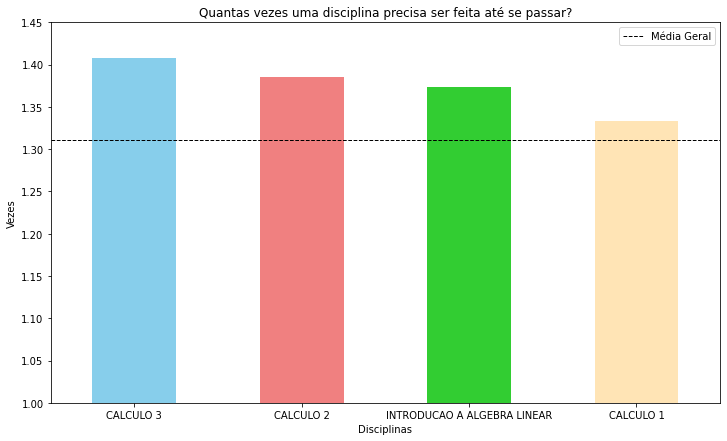

<Figure size 432x288 with 0 Axes>

In [ ]:
# Média de vezes que uma disciplina precisa ser feita até se passar:
media_geral = round(sum(db_4.VEZES_CURSADAS_TOTAIS)/sum(db_4.VEZES_POR_APROVACAO), 3)


# Gráfico de Colunas com as médias de vezes que uma disciplina precsa ser feita até se passar:
%matplotlib inline

plt.figure(figsize=(12, 7))

db_4.sort_values("MEDIA_VEZES_ATE_PASSAR", ascending = False)\
  ["MEDIA_VEZES_ATE_PASSAR"][0:4,].plot(kind="bar",
  color=["skyblue", "lightcoral", "limegreen", "moccasin"], label = "")
plt.xlabel("Disciplinas")
plt.ylabel("Vezes")
plt.title("Quantas vezes uma disciplina precisa ser feita até se passar?")
plt.ylim(1, 1.45)
plt.xticks(rotation = 0)
plt.axhline(y=media_geral,linewidth=1, color="k", linestyle = "--", label = "Média Geral")
plt.legend()
plt.savefig('grafico_1.png')
plt.show()
plt.clf()

### 2.Como as menções diferem entre os departamentos MAT e EST? 

Variáveis de interesse: menção, disciplina. 

Método: teste de independência e tabela de contingência/ gráfico de colunas colorido por departamento. 

Obs.: criar variável de departamento (MAT ou EST). 

In [ ]:
#Filtrando para menções relevantes
db_mencoes = db[~db.MENCAO.isin(["AP", "CC", "DP", "NAN"])]

#Ordenando menções
db_mencoes["MENCAO"] = db_mencoes["MENCAO"].astype("category")
db_mencoes['MENCAO'] = db_mencoes['MENCAO'].cat.reorder_categories(['TJ', 'TR', 'SR', 'II', 'MI', 'MM', 'MS', 'SS'], ordered=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Tabela de Contigência
round(pd.crosstab(db_mencoes.OFERTANTE, db_mencoes.MENCAO, margins=True, normalize="index", colnames=["Menção (%)"], rownames=["Ofertante"]).apply(lambda x : x*100), 2)

Menção (%),TJ,TR,SR,II,MI,MM,MS,SS
Ofertante,,,,,,,,
EST,0.64,4.67,9.20,6.49,7.45,36.74,24.02,10.80
MAT,1.01,4.71,10.44,12.56,11.27,33.44,18.98,7.60
All,0.89,4.70,10.05,10.64,10.06,34.48,20.57,8.61


In [ ]:
#Teste de Independência
scipy.stats.chi2_contingency(pd.crosstab(db_mencoes.OFERTANTE, db_mencoes.MENCAO))

(4436.435643902576,
 0.0,
 7,
 array([[  725.34139142,  3821.01743456,  8175.59751568,  8658.84197672,
          8186.04091268, 28060.14186433, 16740.76538601,  7006.25351861],
        [ 1566.65860858,  8252.98256544, 17658.40248432, 18702.15802328,
         17680.95908732, 60606.85813567, 36158.23461399, 15132.74648139]]))

In [ ]:
#Coeficiente de contingência modificado
qui_quadrado = scipy.stats.chi2_contingency(pd.crosstab(db_mencoes.OFERTANTE, db_mencoes.MENCAO))[0]
(2*qui_quadrado/(len(db_mencoes)+qui_quadrado))**0.5

0.18417835643481428

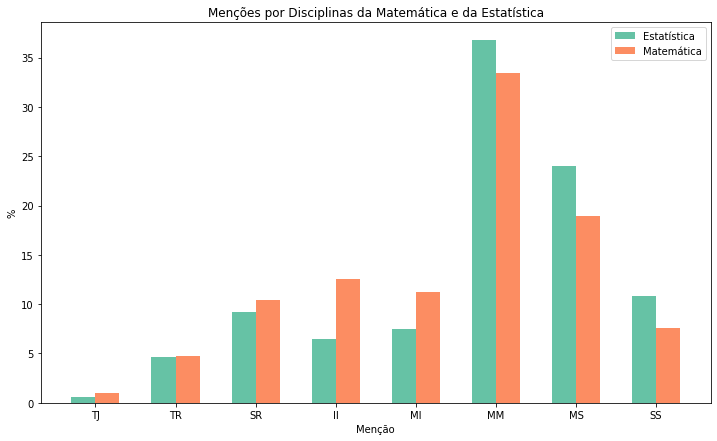

In [ ]:
#Gráfico de colunas
est_bar = (0.6366, 4.6710,	9.1983,	6.4886,	7.4459,	36.7415,	24.0163,	10.8020)
mat_bar = (1.0093,	4.7070,	10.4399,	12.5632,	11.2700,	33.4373,	18.9783,	7.5951)
plt.figure(figsize=(12, 7))    
plt.bar(np.arange(8), est_bar , 0.3, label='Estatística')
plt.bar(np.arange(8) + 0.3, mat_bar, 0.3, label='Matemática')
plt.xticks(np.arange(8) + 0.3 / 2, ('TJ', 'TR', 'SR', 'II', 'MI', 'MM', 'MS', 'SS'))
plt.legend(loc='best')
plt.xlabel("Menção")
plt.ylabel("%")
plt.title("Menções por Disciplinas da Matemática e da Estatística")
plt.savefig('grafico_2.png')
plt.show()

### 3.Em qual semestre é mais comum que os alunos da Estatística saiam do curso? 

Variáveis de interesse: nome do aluno, disciplina, período, curso. 

Método: listar alunos que desistiram do curso e usar gráficos de colunas para visualizar os semestres de desistência. 

Obs.: filtrar os dados para alunos da estatística que sumiram do banco de dados sem ter aprovação no TCC2. Mapear o semestre em que o aluno está a partir do seu primeiro registro no banco de dados (para o semestre letivo) e a partir das suas disciplinas cursadas (para o semestre do fluxo). Criar variáveis para os semestres de desistência. 

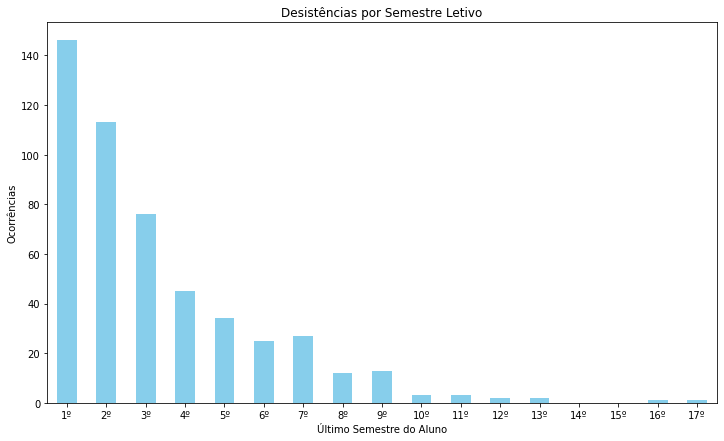

<Figure size 432x288 with 0 Axes>

In [ ]:
# Novo DB com os alunos que ainda não formaram na Estatística,
# usando como formandos aqueles que passaram em TCC2 e/ou estágio 2:
formados_nomes = list(db[(db.DISCIPLINA == "TRABALHO DE CONCLUSAO DE CURSO 2") &
                  (db.APROVACAO == "SIM") & (db.CURSO == "ESTATISTICA")].index)
db_evasao = db[~db.index.isin(formados_nomes)]

formados_nomes = list(db[(db.DISCIPLINA == "ESTAGIO SUPERVISIONADO EM ESTATISTICA 2") &
                  (db.APROVACAO == "SIM") & (db.CURSO == "ESTATISTICA")].index)
db_evasao = db_evasao[~db_evasao.index.isin(formados_nomes)]

db_evasao = db_evasao[db_evasao.CURSO == "ESTATISTICA"]

# Removendo as entradas que não se aplicam, referentes ao status de aprovação,
# tais quais trancamento ou concessão de crédito:
nao_aplicavel = list(db_evasao[db_evasao.APROVACAO == "NAO_APLICAVEL"].index)
db_evasao = db_evasao[~db_evasao.index.isin(nao_aplicavel)]

# Considerando que os alunos que se matricularam em ao menos menos uma matéria em
# 2019 ou 2020 ou 2021 não saíram do curso (inclusive os prováveis formandos)
# também retiramos os mesmos- são alunos regulares:
# 2019
alunos_ativos = list(db_evasao[db_evasao.ANO == 2019].index.unique())

db_evasao = db_evasao[~db_evasao.index.isin(alunos_ativos)]

# 2020
alunos_ativos = list(db_evasao[db_evasao.ANO == 2020].index.unique())

db_evasao = db_evasao[~db_evasao.index.isin(alunos_ativos)]

# 2021
alunos_ativos = list(db_evasao[db_evasao.ANO == 2021].index.unique())

db_evasao = db_evasao[~db_evasao.index.isin(alunos_ativos)]

#db_evasao = db_evasao.set_index("NOME")

# listas vazia a ser preenchida com o número de semestres cursados:
semestre_abandono = []
for name in db_evasao.index:
    semestre_abandono.append(len(db_evasao[db_evasao.index == name]\
                                 ["SEMESTRE"].unique()))

# Criando variável com semestre de abandono:
db_evasao["SEMESTRE ABANDONO"] = np.array(semestre_abandono)
db_evasao = db_evasao.astype({"SEMESTRE ABANDONO" : str})
db_evasao["SEMESTRE ABANDONO"] = db_evasao["SEMESTRE ABANDONO"]+"º"


# Gráfico de Colunas com os semestres de abandono (período letivo):
db_evasao_aluno = db_evasao.copy()
db_evasao_aluno["NOME"] = db_evasao_aluno.index
db_evasao_aluno = db_evasao_aluno.drop_duplicates(subset="NOME")

%matplotlib inline
freq = db_evasao_aluno["SEMESTRE ABANDONO"].value_counts()
plt.figure(figsize=(12, 7)) 
freq.reindex(["1º", "2º", "3º", "4º", "5º", "6º", "7º", "8º", "9º", "10º",
              "11º", "12º", "13º", "14º", "15º", "16º", "17º"])\
              .plot(kind="bar", color="skyblue")
plt.xlabel("Último Semestre do Aluno")
plt.ylabel("Ocorrências")
plt.title("Desistências por Semestre Letivo")
plt.xticks(rotation = 0)
plt.savefig('grafico_3.png')
plt.show()
plt.clf()

83


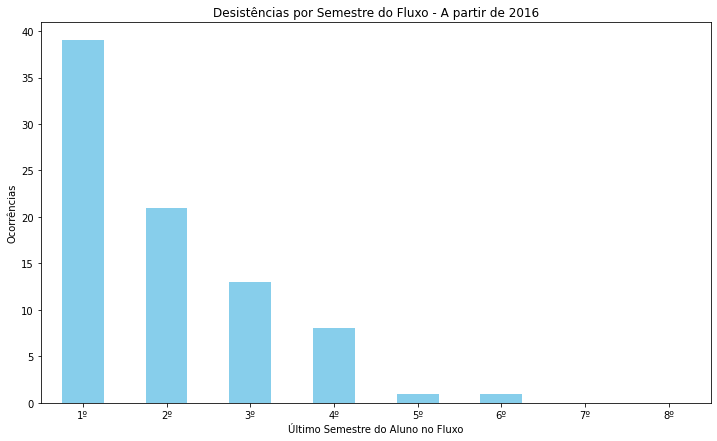

<Figure size 432x288 with 0 Axes>

In [ ]:
# Tomando somente de 2016 em diante (novo currículo):
# Separando o último semestre do aluno no fluxo
ultimo_semestre_fluxo =[]
for nome in db_evasao[db_evasao.ANO >= 2016].index.unique():
  ultimo_semestre_fluxo.append(max(db_evasao[db_evasao.index==nome]\
                                   ["SEMESTRE FLUXO"]))
ultimo_semestre_fluxo = pd.Series(ultimo_semestre_fluxo)
ultimo_semestre_fluxo = ultimo_semestre_fluxo.astype("str")+"º"

print(sum(ultimo_semestre_fluxo.value_counts()))

# Gráfico de Colunas com os semestres de abandono (fluxo)
%matplotlib inline
freq = ultimo_semestre_fluxo.value_counts()
plt.figure(figsize=(12, 7)) 
freq.reindex(["1º", "2º", "3º", "4º", "5º", "6º", "7º", "8º"])\
.plot(kind="bar",color="skyblue")
plt.xlabel("Último Semestre do Aluno no Fluxo")
plt.ylabel("Ocorrências")
plt.title("Desistências por Semestre do Fluxo - A partir de 2016")
plt.xticks(rotation = 0)
plt.savefig('grafico_4.png')
plt.show()
plt.clf()

### 4.Como a taxa de evasão mudou ao longo dos anos? 

Variáveis de interesse: nome do aluno, disciplina, período, curso. 

Método: usar a mesma filtragem da pergunta anterior para calcular a proporção de alunos que saíram em cada ano (em relação ao total de matriculados na Estatística naquele ano). Fazer gráfico de linha para visualizar a evolução dessa taxa ao longo dos anos. 

In [ ]:
# Db com os alunos evadidos até 2019:
alunos_evasao = list(db_evasao.index.unique())
ano_entrada = []
ano_saida = []
for aluno in alunos_evasao:
  ano_entrada.append(min(list(db_evasao[db_evasao.index == aluno]["ANO"])))
  ano_saida.append(max(list(db_evasao[db_evasao.index == aluno]["ANO"])))

db_evasao_anos = pd.DataFrame(data = {"NOME" : alunos_evasao,
                                      "ANO_ENTRADA" : ano_entrada,
                                      "ANO_SAIDA" : ano_saida})
db_evasao_anos

,NOME,ANO_ENTRADA,ANO_SAIDA
0,GORZUTFGTJXGJK,1994,1995
1,GRKDGTJXKFJKFYUAFGFPATOUX,1994,1995
2,GRKDGTJXKFJUYFYGTZUYFYORBG,1994,1994
3,GRKDGTJXKFZNKUZUTOUFZKODKOXGFXOUY,1994,1994
4,GROIOUFLGHOUFHGXXUY,1994,1994
...,...,...,...
498,SGXOGFRAOYGFYORBGFMAOSGXGKYFSUXGOY,2018,2018
499,GTJXKFRAOYFHGXHUYGFJGFYORBGFZKRKY,2018,2018
500,VKJXUFXKHKYINOTOFLOMAKOXKJU,2018,2018
501,1OIZUXFNAMUFJKFVGOBGFSUXKTU,2018,2018


In [ ]:
# Abandonos por ano na EST
db_evasao_anos = db_evasao_anos.groupby(["ANO_SAIDA"]).size().reset_index(name='ALUNOS_ABANDONO_POR_ANO')
db_evasao_anos = db_evasao_anos.rename({"ANO_SAIDA": "ANO"},axis = 1)

In [ ]:
# Entrada por ano na EST
db_test = db.reset_index()
db_test = db_test[db_test.CURSO == "ESTATISTICA"]
db_test = db_test.drop_duplicates("NOME")


db_test = db_test.groupby(["ANO_ENTRADA"]).size().reset_index(name='ENTRADA_ALUNO_POR_ANO')
db_test = db_test.rename({"ANO_ENTRADA": "ANO"},axis = 1)

In [ ]:
# Unificando os DBs
db_evasao_anos  = db_evasao_anos.merge(db_test, how="left", on = "ANO")

# Retirando as entradas referentes a 2019 até 2021:
db_evasao_anos = db_evasao_anos[db_evasao_anos.ANO <= 2018]

# Retirando o ano de 1994 (contém não somente entrada mas alunos que já estavam anteriormente):
db_evasao_anos = db_evasao_anos[db_evasao_anos.ANO > 1994]
# Criando variável taxa de evasao por ano:
db_evasao_anos["TAXA_ABANDONO_POR_ANO"] = round((db_evasao_anos["ALUNOS_ABANDONO_POR_ANO"]\
                                           / db_evasao_anos["ENTRADA_ALUNO_POR_ANO"]) * 100, 2)

db_evasao_anos = db_evasao_anos.set_index("ANO")

db_evasao_anos

,ALUNOS_ABANDONO_POR_ANO,ENTRADA_ALUNO_POR_ANO,TAXA_ABANDONO_POR_ANO
ANO,,,
1995,21,60,35.00
1996,13,49,26.53
1997,10,42,23.81
1998,10,43,23.26
1999,14,45,31.11
2000,16,49,32.65
2001,18,48,37.50
2002,9,52,17.31
2003,11,58,18.97


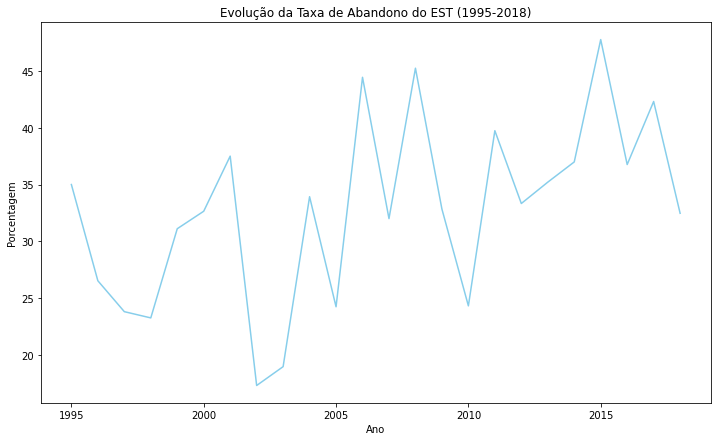

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráfico da Série Temporal da evolução da Taxa de Evasão do EST 1995-2018:
%matplotlib inline

plt.figure(figsize=(12, 7))
db_evasao_anos["TAXA_ABANDONO_POR_ANO"].plot(color = "skyblue")
plt.xlabel("Ano")
plt.ylabel("Porcentagem")
plt.title("Evolução da Taxa de Evasão do EST (1995-2018)")
plt.xticks(rotation = 0)
plt.savefig('grafico_5.png')
plt.show()
plt.clf()

### 5.Como as notas em PE mudaram depois que houve a unificação da disciplina? 

Variáveis de interesse: período, menção, professor. 

Método: fazer gráficos de colunas para comparar as proporções das menções (antes e depois da unificação). Fazer gráficos de barras superpostas para comparar as menções entre professores (antes e depois da unificação). 

Obs.: Criar variável do ano a partir do período. 

In [ ]:
# Filtrando para menções relevantes
db_mencoes = db[~db.MENCAO.isin(["AP", "CC", "DP", "NAN", "TJ", "TR"])]

# Ordenando menções
db_mencoes["MENCAO"] = db_mencoes["MENCAO"].astype("category")
db_mencoes['MENCAO'] = db_mencoes['MENCAO'].cat.reorder_categories(['SR', 'II', 'MI', 'MM', 'MS', 'SS'], ordered=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Criando variável ano
db_mencoes["ANO"] = db_mencoes["SEMESTRE"]
db_mencoes["ANO"] = db_mencoes["ANO"].astype("object")
anos = []
for linha in db_mencoes["ANO"]:
  anos.append(linha[0:4])
db_mencoes["ANO"] = anos
db_mencoes["ANO"] = db_mencoes["ANO"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Menções de PE antes da unificação
db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].MENCAO.value_counts()/sum(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].MENCAO.value_counts())

MM    0.427904
MS    0.219533
SR    0.104034
SS    0.090810
MI    0.087231
II    0.070488
Name: MENCAO, dtype: float64

In [ ]:
# Menções de PE depois da unificação
db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].MENCAO.value_counts()/sum(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].MENCAO.value_counts())

MM    0.415898
MS    0.248048
MI    0.099716
SR    0.090135
SS    0.080554
II    0.065649
Name: MENCAO, dtype: float64

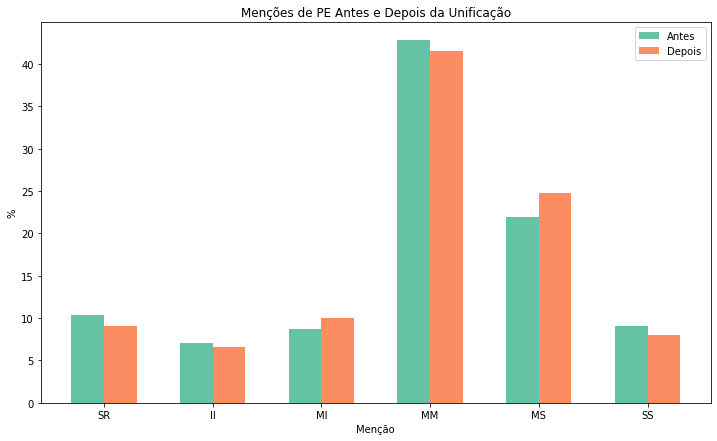

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráfico de colunas
sns.set_palette(sns.color_palette("Set2"))
antes = (10.4034, 7.0488, 8.7231, 42.7904, 21.9533, 9.0810)
depois = (9.0135, 6.5649, 9.9716, 41.5898, 24.8048, 8.0554)
plt.figure(figsize=(12, 7))    
plt.bar(np.arange(6), antes , 0.3, label='Antes')
plt.bar(np.arange(6) + 0.3, depois, 0.3, label='Depois')
plt.xticks(np.arange(6) + 0.3 / 2, ('SR', 'II', 'MI', 'MM', 'MS', 'SS'))
plt.legend(loc='best')
plt.xlabel("Menção")
plt.ylabel("%")
plt.title("Menções de PE Antes e Depois da Unificação")
plt.savefig('grafico_6.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (antes)
lista_professores = db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].PROFESSOR.unique()

#SR
lista_SR = []
for professor in lista_professores:
  lista_SR.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II = []
for professor in lista_professores:
  lista_II.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI = []
for professor in lista_professores:
  lista_MI.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM = []
for professor in lista_professores:
  lista_MM.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS = []
for professor in lista_professores:
  lista_MS.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS = []
for professor in lista_professores:
  lista_SS.append(len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["ANO"]<2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df = {"Professor" : lista_professores, "SR" : lista_SR, "II" : lista_II, "MI" : lista_MI, "MM" : lista_MM, "MS" : lista_MS, "SS" : lista_SS}
df = pd.DataFrame(df)
df = df.sort_values('SS')
lista_professores = df.Professor
lista_SS = df.SS
lista_MS = df.MS
lista_MM = df.MM
lista_MI = df.MI
lista_II = df.II
lista_SR = df.SR

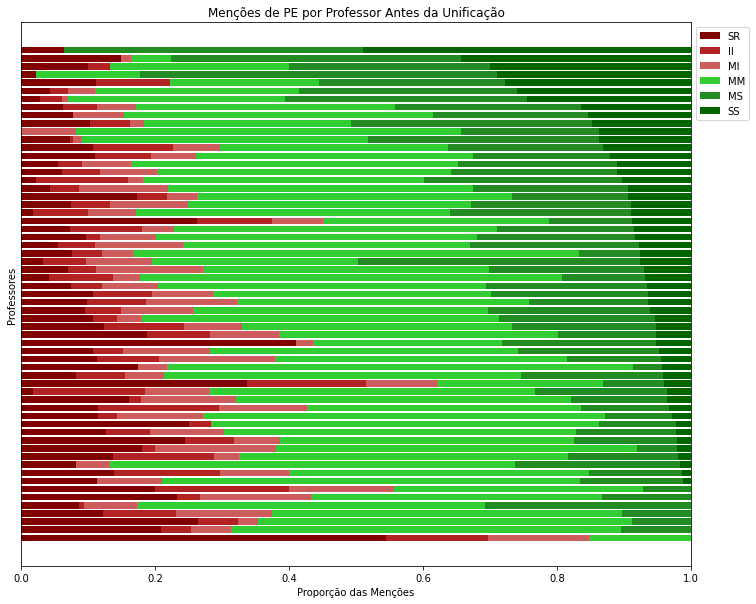

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de PE por professor (antes da unificação)
plt.figure(figsize=(12,10))
plt.barh(lista_professores, lista_SR, color="maroon", label="SR")
plt.barh(lista_professores, lista_II, color="firebrick", left=lista_SR, label="II")
plt.barh(lista_professores, lista_MI, color="indianred", left=[sum(data) for data in zip(lista_II, lista_SR)], label="MI")
plt.barh(lista_professores, lista_MM, color="limegreen", left=[sum(data) for data in zip(lista_MI, lista_II, lista_SR)], label="MM")
plt.barh(lista_professores, lista_MS, color="forestgreen", left=[sum(data) for data in zip(lista_MM, lista_MI, lista_II, lista_SR)], label="MS")
plt.barh(lista_professores, lista_SS, color="darkgreen", left=[sum(data) for data in zip(lista_MS, lista_MM, lista_MI, lista_II, lista_SR)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de PE por Professor Antes da Unificação")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_7.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (depois)
lista_professores1 = db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA")].PROFESSOR.unique()

#SR
lista_SR1 = []
for professor in lista_professores1:
  lista_SR1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II1 = []
for professor in lista_professores1:
  lista_II1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI1 = []
for professor in lista_professores1:
  lista_MI1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM1 = []
for professor in lista_professores1:
  lista_MM1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS1 = []
for professor in lista_professores1:
  lista_MS1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS1 = []
for professor in lista_professores1:
  lista_SS1.append(len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["ANO"]>=2018) & (db_mencoes["DISCIPLINA"]=="PROBABILIDADE E ESTATISTICA") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df1 = {"Professor" : lista_professores1, "SR" : lista_SR1, "II" : lista_II1, "MI" : lista_MI1, "MM" : lista_MM1, "MS" : lista_MS1, "SS" : lista_SS1}
df1 = pd.DataFrame(df1)
df1 = df1.sort_values('SS')
lista_professores1 = df1.Professor
lista_SS1 = df1.SS
lista_MS1 = df1.MS
lista_MM1 = df1.MM
lista_MI1 = df1.MI
lista_II1 = df1.II
lista_SR1 = df1.SR

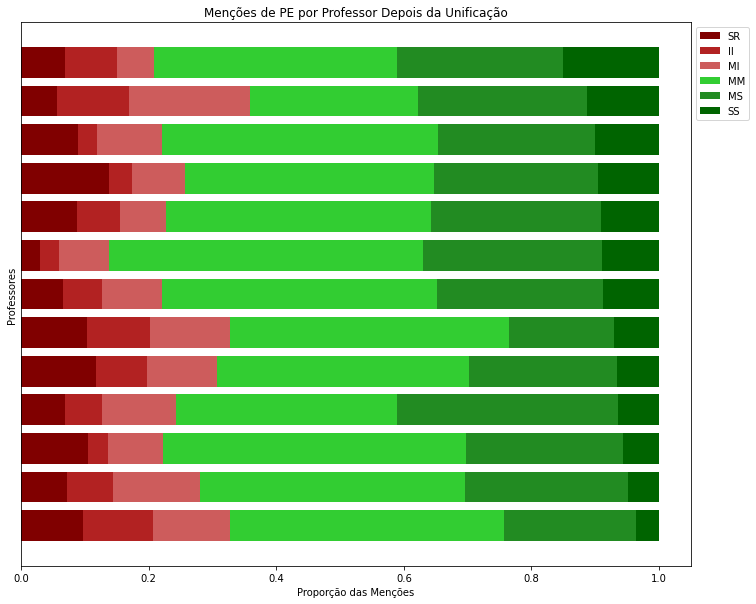

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de PE por professor (depois da unificação)
plt.figure(figsize=(12,10))
plt.barh(lista_professores1, lista_SR1, color="maroon", label="SR")
plt.barh(lista_professores1, lista_II1, color="firebrick", left=lista_SR1, label="II")
plt.barh(lista_professores1, lista_MI1, color="indianred", left=[sum(data) for data in zip(lista_II1, lista_SR1)], label="MI")
plt.barh(lista_professores1, lista_MM1, color="limegreen", left=[sum(data) for data in zip(lista_MI1, lista_II1, lista_SR1)], label="MM")
plt.barh(lista_professores1, lista_MS1, color="forestgreen", left=[sum(data) for data in zip(lista_MM1, lista_MI1, lista_II1, lista_SR1)], label="MS")
plt.barh(lista_professores1, lista_SS1, color="darkgreen", left=[sum(data) for data in zip(lista_MS1, lista_MM1, lista_MI1, lista_II1, lista_SR1)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de PE por Professor Depois da Unificação")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_8.png')
plt.show()
plt.clf()

### 6.O professor influencia significativamente no rendimento dos alunos? 

Variáveis de interesse: menção, disciplina, professor. 

Método: comparar professores dentro de cada disciplina usando barras superpostas das menções dos alunos com cada professor (um gráfico para cada disciplina de interesse).

In [ ]:
#Preparação para o gráfico de barras superpostas (CP1)
lista_professores2 = db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1")].PROFESSOR.unique()

#SR
lista_SR2 = []
for professor in lista_professores2:
  lista_SR2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II2 = []
for professor in lista_professores2:
  lista_II2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI2 = []
for professor in lista_professores2:
  lista_MI2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM2 = []
for professor in lista_professores2:
  lista_MM2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS2 = []
for professor in lista_professores2:
  lista_MS2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS2 = []
for professor in lista_professores2:
  lista_SS2.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 1") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df2 = {"Professor" : lista_professores2, "SR" : lista_SR2, "II" : lista_II2, "MI" : lista_MI2, "MM" : lista_MM2, "MS" : lista_MS2, "SS" : lista_SS2}
df2 = pd.DataFrame(df2)
df2 = df2.sort_values('SS')
lista_professores2 = df2.Professor
lista_SS2 = df2.SS
lista_MS2 = df2.MS
lista_MM2 = df2.MM
lista_MI2 = df2.MI
lista_II2 = df2.II
lista_SR2 = df2.SR

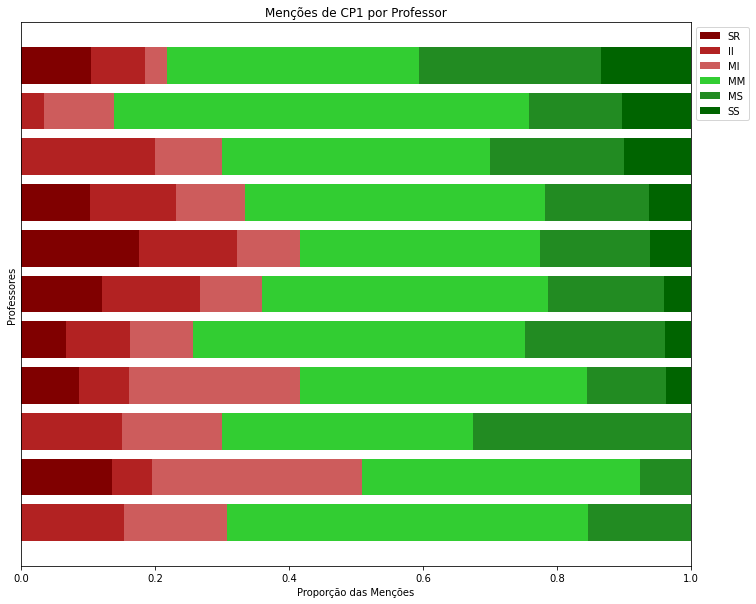

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de CP1 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores2, lista_SR2, color="maroon", label="SR")
plt.barh(lista_professores2, lista_II2, color="firebrick", left=lista_SR2, label="II")
plt.barh(lista_professores2, lista_MI2, color="indianred", left=[sum(data) for data in zip(lista_II2, lista_SR2)], label="MI")
plt.barh(lista_professores2, lista_MM2, color="limegreen", left=[sum(data) for data in zip(lista_MI2, lista_II2, lista_SR2)], label="MM")
plt.barh(lista_professores2, lista_MS2, color="forestgreen", left=[sum(data) for data in zip(lista_MM2, lista_MI2, lista_II2, lista_SR2)], label="MS")
plt.barh(lista_professores2, lista_SS2, color="darkgreen", left=[sum(data) for data in zip(lista_MS2, lista_MM2, lista_MI2, lista_II2, lista_SR2)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de CP1 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_9.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (CP2)
lista_professores3 = db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2")].PROFESSOR.unique()

#SR
lista_SR3 = []
for professor in lista_professores3:
  lista_SR3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II3 = []
for professor in lista_professores3:
  lista_II3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI3 = []
for professor in lista_professores3:
  lista_MI3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM3 = []
for professor in lista_professores3:
  lista_MM3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS3 = []
for professor in lista_professores3:
  lista_MS3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS3 = []
for professor in lista_professores3:
  lista_SS3.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO DE PROBABILIDADE 2") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df3 = {"Professor" : lista_professores3, "SR" : lista_SR3, "II" : lista_II3, "MI" : lista_MI3, "MM" : lista_MM3, "MS" : lista_MS3, "SS" : lista_SS3}
df3 = pd.DataFrame(df3)
df3 = df3.sort_values('SS')
lista_professores3 = df3.Professor
lista_SS3 = df3.SS
lista_MS3 = df3.MS
lista_MM3 = df3.MM
lista_MI3 = df3.MI
lista_II3 = df3.II
lista_SR3 = df3.SR

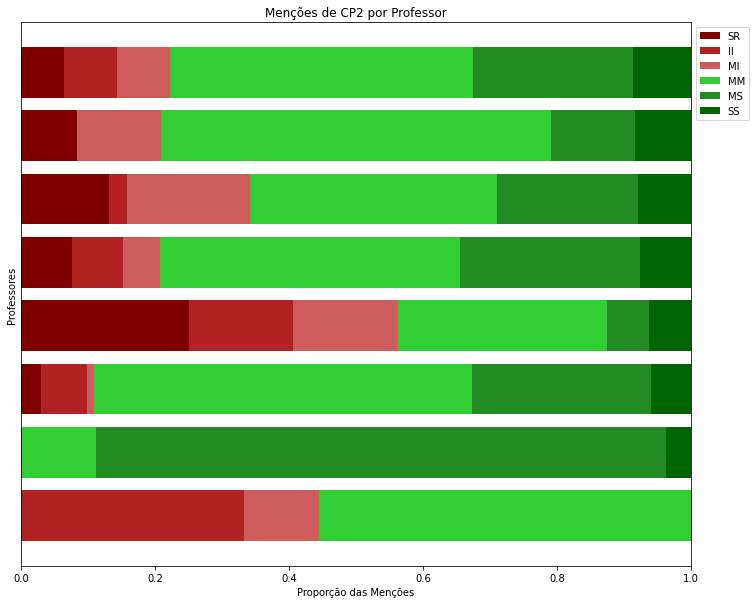

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de CP2 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores3, lista_SR3, color="maroon", label="SR")
plt.barh(lista_professores3, lista_II3, color="firebrick", left=lista_SR3, label="II")
plt.barh(lista_professores3, lista_MI3, color="indianred", left=[sum(data) for data in zip(lista_II3, lista_SR3)], label="MI")
plt.barh(lista_professores3, lista_MM3, color="limegreen", left=[sum(data) for data in zip(lista_MI3, lista_II3, lista_SR3)], label="MM")
plt.barh(lista_professores3, lista_MS3, color="forestgreen", left=[sum(data) for data in zip(lista_MM3, lista_MI3, lista_II3, lista_SR3)], label="MS")
plt.barh(lista_professores3, lista_SS3, color="darkgreen", left=[sum(data) for data in zip(lista_MS3, lista_MM3, lista_MI3, lista_II3, lista_SR3)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de CP2 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_10.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (C1)
lista_professores4 = db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1")].PROFESSOR.unique()

#SR
lista_SR4 = []
for professor in lista_professores4:
  lista_SR4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II4 = []
for professor in lista_professores4:
  lista_II4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI4 = []
for professor in lista_professores4:
  lista_MI4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM4 = []
for professor in lista_professores4:
  lista_MM4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS4 = []
for professor in lista_professores4:
  lista_MS4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS4 = []
for professor in lista_professores4:
  lista_SS4.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 1") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df4 = {"Professor" : lista_professores4, "SR" : lista_SR4, "II" : lista_II4, "MI" : lista_MI4, "MM" : lista_MM4, "MS" : lista_MS4, "SS" : lista_SS4}
df4 = pd.DataFrame(df4)
df4 = df4.sort_values('SS')
lista_professores4 = df4.Professor
lista_SS4 = df4.SS
lista_MS4 = df4.MS
lista_MM4 = df4.MM
lista_MI4 = df4.MI
lista_II4 = df4.II
lista_SR4 = df4.SR

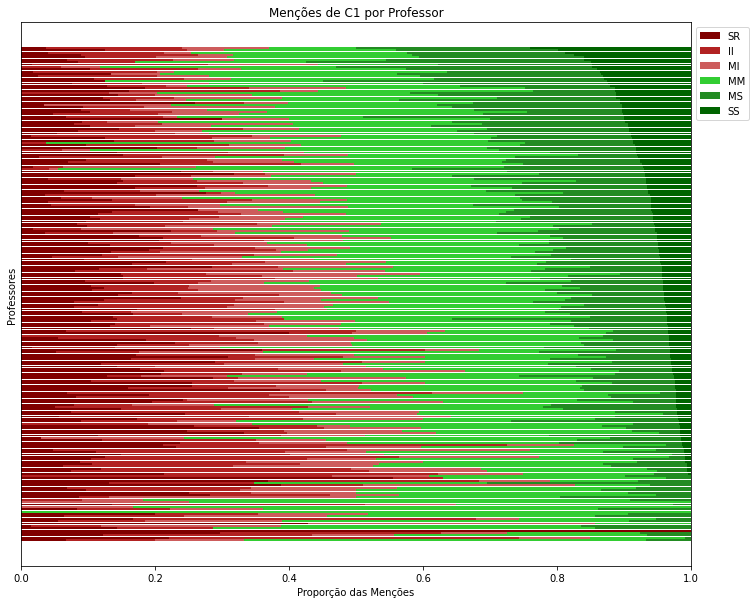

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de C1 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores4, lista_SR4, color="maroon", label="SR")
plt.barh(lista_professores4, lista_II4, color="firebrick", left=lista_SR4, label="II")
plt.barh(lista_professores4, lista_MI4, color="indianred", left=[sum(data) for data in zip(lista_II4, lista_SR4)], label="MI")
plt.barh(lista_professores4, lista_MM4, color="limegreen", left=[sum(data) for data in zip(lista_MI4, lista_II4, lista_SR4)], label="MM")
plt.barh(lista_professores4, lista_MS4, color="forestgreen", left=[sum(data) for data in zip(lista_MM4, lista_MI4, lista_II4, lista_SR4)], label="MS")
plt.barh(lista_professores4, lista_SS4, color="darkgreen", left=[sum(data) for data in zip(lista_MS4, lista_MM4, lista_MI4, lista_II4, lista_SR4)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de C1 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_11.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (C2)
lista_professores5 = db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2")].PROFESSOR.unique()

#SR
lista_SR5 = []
for professor in lista_professores5:
  lista_SR5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II5 = []
for professor in lista_professores5:
  lista_II5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI5 = []
for professor in lista_professores5:
  lista_MI5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM5 = []
for professor in lista_professores5:
  lista_MM5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS5 = []
for professor in lista_professores5:
  lista_MS5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS5 = []
for professor in lista_professores5:
  lista_SS5.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="CALCULO 2") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df5 = {"Professor" : lista_professores5, "SR" : lista_SR5, "II" : lista_II5, "MI" : lista_MI5, "MM" : lista_MM5, "MS" : lista_MS5, "SS" : lista_SS5}
df5 = pd.DataFrame(df5)
df5 = df5.sort_values('SS')
lista_professores5 = df5.Professor
lista_SS5 = df5.SS
lista_MS5 = df5.MS
lista_MM5 = df5.MM
lista_MI5 = df5.MI
lista_II5 = df5.II
lista_SR5 = df5.SR

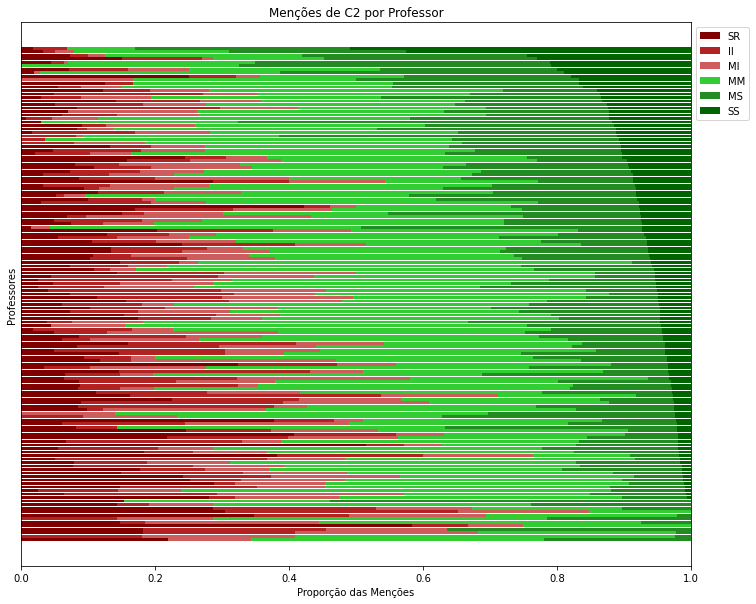

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de C2 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores5, lista_SR5, color="maroon", label="SR")
plt.barh(lista_professores5, lista_II5, color="firebrick", left=lista_SR5, label="II")
plt.barh(lista_professores5, lista_MI5, color="indianred", left=[sum(data) for data in zip(lista_II5, lista_SR5)], label="MI")
plt.barh(lista_professores5, lista_MM5, color="limegreen", left=[sum(data) for data in zip(lista_MI5, lista_II5, lista_SR5)], label="MM")
plt.barh(lista_professores5, lista_MS5, color="forestgreen", left=[sum(data) for data in zip(lista_MM5, lista_MI5, lista_II5, lista_SR5)], label="MS")
plt.barh(lista_professores5, lista_SS5, color="darkgreen", left=[sum(data) for data in zip(lista_MS5, lista_MM5, lista_MI5, lista_II5, lista_SR5)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de C2 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_12.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (IP)
lista_professores6 = db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE")].PROFESSOR.unique()

#SR
lista_SR6 = []
for professor in lista_professores6:
  lista_SR6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II6 = []
for professor in lista_professores6:
  lista_II6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI6 = []
for professor in lista_professores6:
  lista_MI6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM6 = []
for professor in lista_professores6:
  lista_MM6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS6 = []
for professor in lista_professores6:
  lista_MS6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS6 = []
for professor in lista_professores6:
  lista_SS6.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="INTRODUCAO A PROBABILIDADE") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df6 = {"Professor" : lista_professores6, "SR" : lista_SR6, "II" : lista_II6, "MI" : lista_MI6, "MM" : lista_MM6, "MS" : lista_MS6, "SS" : lista_SS6}
df6 = pd.DataFrame(df6)
df6 = df6.sort_values('SS')
lista_professores6 = df6.Professor
lista_SS6 = df6.SS
lista_MS6 = df6.MS
lista_MM6 = df6.MM
lista_MI6 = df6.MI
lista_II6 = df6.II
lista_SR6 = df6.SR

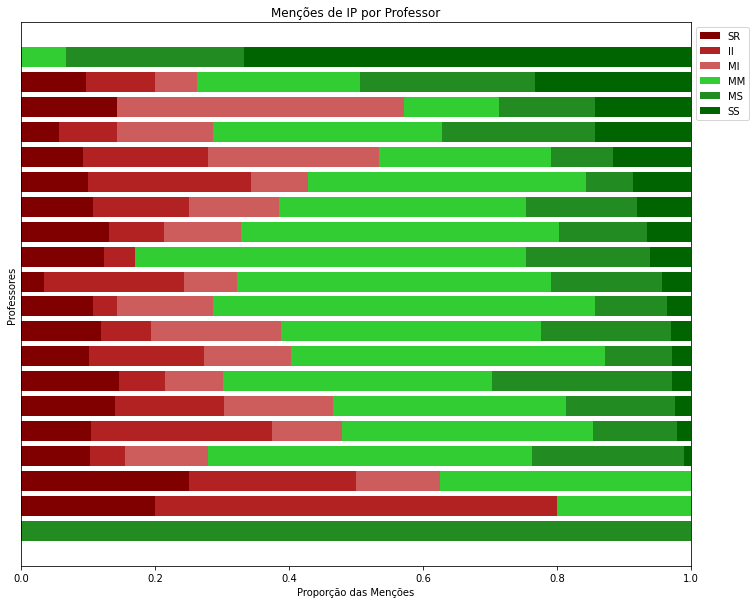

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de IP por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores6, lista_SR6, color="maroon", label="SR")
plt.barh(lista_professores6, lista_II6, color="firebrick", left=lista_SR6, label="II")
plt.barh(lista_professores6, lista_MI6, color="indianred", left=[sum(data) for data in zip(lista_II6, lista_SR6)], label="MI")
plt.barh(lista_professores6, lista_MM6, color="limegreen", left=[sum(data) for data in zip(lista_MI6, lista_II6, lista_SR6)], label="MM")
plt.barh(lista_professores6, lista_MS6, color="forestgreen", left=[sum(data) for data in zip(lista_MM6, lista_MI6, lista_II6, lista_SR6)], label="MS")
plt.barh(lista_professores6, lista_SS6, color="darkgreen", left=[sum(data) for data in zip(lista_MS6, lista_MM6, lista_MI6, lista_II6, lista_SR6)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de IP por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_13.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (ME1)
lista_professores7 = db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1")].PROFESSOR.unique()

#SR
lista_SR7 = []
for professor in lista_professores7:
  lista_SR7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II7 = []
for professor in lista_professores7:
  lista_II7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI7 = []
for professor in lista_professores7:
  lista_MI7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM7 = []
for professor in lista_professores7:
  lista_MM7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS7 = []
for professor in lista_professores7:
  lista_MS7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS7 = []
for professor in lista_professores7:
  lista_SS7.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 1") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df7 = {"Professor" : lista_professores7, "SR" : lista_SR7, "II" : lista_II7, "MI" : lista_MI7, "MM" : lista_MM7, "MS" : lista_MS7, "SS" : lista_SS7}
df7 = pd.DataFrame(df7)
df7 = df7.sort_values('SS')
lista_professores7 = df7.Professor
lista_SS7 = df7.SS
lista_MS7 = df7.MS
lista_MM7 = df7.MM
lista_MI7 = df7.MI
lista_II7 = df7.II
lista_SR7 = df7.SR

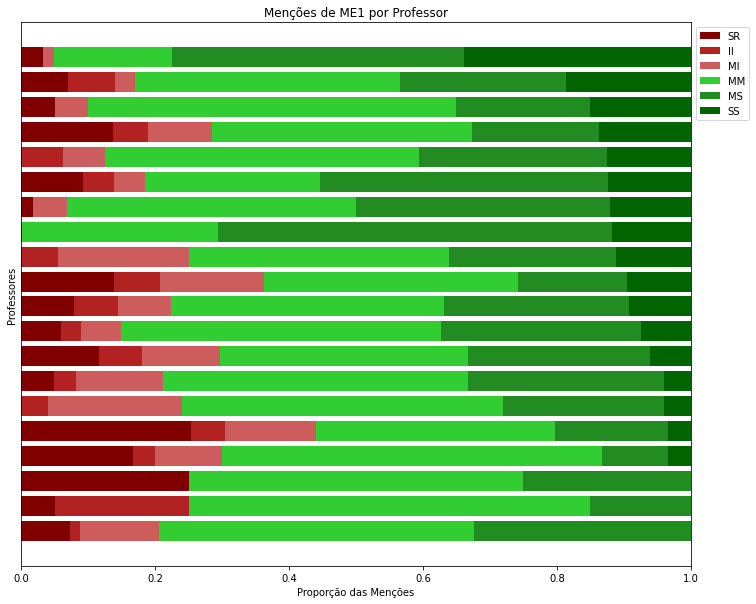

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de ME1 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores7, lista_SR7, color="maroon", label="SR")
plt.barh(lista_professores7, lista_II7, color="firebrick", left=lista_SR7, label="II")
plt.barh(lista_professores7, lista_MI7, color="indianred", left=[sum(data) for data in zip(lista_II7, lista_SR7)], label="MI")
plt.barh(lista_professores7, lista_MM7, color="limegreen", left=[sum(data) for data in zip(lista_MI7, lista_II7, lista_SR7)], label="MM")
plt.barh(lista_professores7, lista_MS7, color="forestgreen", left=[sum(data) for data in zip(lista_MM7, lista_MI7, lista_II7, lista_SR7)], label="MS")
plt.barh(lista_professores7, lista_SS7, color="darkgreen", left=[sum(data) for data in zip(lista_MS7, lista_MM7, lista_MI7, lista_II7, lista_SR7)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de ME1 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_14.png')
plt.show()
plt.clf()

In [ ]:
#Preparação para o gráfico de barras superpostas (ME2)
lista_professores8 = db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2")].PROFESSOR.unique()

#SR
lista_SR8 = []
for professor in lista_professores8:
  lista_SR8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SR")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

#II
lista_II8 = []
for professor in lista_professores8:
  lista_II8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="II")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MI
lista_MI8 = []
for professor in lista_professores8:
  lista_MI8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MI")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MM
lista_MM8 = []
for professor in lista_professores8:
  lista_MM8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MM")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

#MS
lista_MS8 = []
for professor in lista_professores8:
  lista_MS8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="MS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

#SS
lista_SS8 = []
for professor in lista_professores8:
  lista_SS8.append(len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor) & (db_mencoes["MENCAO"]=="SS")])/len(db_mencoes[(db_mencoes["DISCIPLINA"]=="METODOS ESTATISTICOS 2") & (db_mencoes["PROFESSOR"]==professor)]))

In [ ]:
#Ordenando por maior proporção de SS
df8 = {"Professor" : lista_professores8, "SR" : lista_SR8, "II" : lista_II8, "MI" : lista_MI8, "MM" : lista_MM8, "MS" : lista_MS8, "SS" : lista_SS8}
df8 = pd.DataFrame(df8)
df8 = df8.sort_values('SS')
lista_professores8 = df8.Professor
lista_SS8 = df8.SS
lista_MS8 = df8.MS
lista_MM8 = df8.MM
lista_MI8 = df8.MI
lista_II8 = df8.II
lista_SR8 = df8.SR

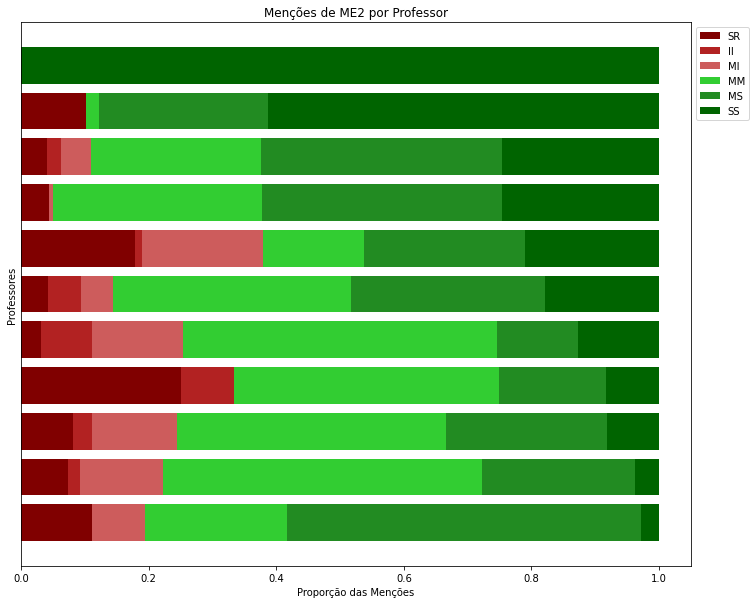

<Figure size 432x288 with 0 Axes>

In [ ]:
#Gráfico das menções de ME2 por professor
plt.figure(figsize=(12,10))
plt.barh(lista_professores8, lista_SR8, color="maroon", label="SR")
plt.barh(lista_professores8, lista_II8, color="firebrick", left=lista_SR8, label="II")
plt.barh(lista_professores8, lista_MI8, color="indianred", left=[sum(data) for data in zip(lista_II8, lista_SR8)], label="MI")
plt.barh(lista_professores8, lista_MM8, color="limegreen", left=[sum(data) for data in zip(lista_MI8, lista_II8, lista_SR8)], label="MM")
plt.barh(lista_professores8, lista_MS8, color="forestgreen", left=[sum(data) for data in zip(lista_MM8, lista_MI8, lista_II8, lista_SR8)], label="MS")
plt.barh(lista_professores8, lista_SS8, color="darkgreen", left=[sum(data) for data in zip(lista_MS8, lista_MM8, lista_MI8, lista_II8, lista_SR8)], label="SS")
plt.yticks([])
plt.xlabel("Proporção das Menções")
plt.ylabel("Professores")
plt.title("Menções de ME2 por Professor")
plt.legend(loc="best",bbox_to_anchor=(1.0,1.0))
plt.savefig('grafico_15.png')
plt.show()
plt.clf()

### 7.Quais disciplinas podem precisar de novas turmas? 

Variáveis de interesse: período, disciplina, menção. 

Método: localizar as disciplinas com maior taxa de reprovação e fazer a análise para cada uma delas. Usar gráfico de colunas transparentes e sobrepostas para comparar o número de matrículas em cada semestre e o número de estudantes que reprovaram a matéria no semestre anterior. 

Obs.: partir do pressuposto de que quem reprovou vai querer fazer a matéria de novo no semestre seguinte. Usar os dados dos últimos anos. Focar análise nos estudantes de estatística. 

<Figure size 864x1440 with 0 Axes>

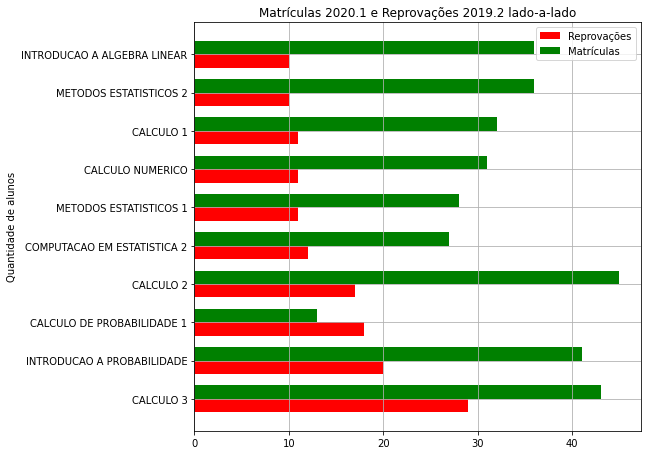

In [ ]:
#análise do semestre 2020.1 com base nas reprovações de 2019.2
#Top 10 matérias com maiores valores de reprovação de 2019.2 
semestre_20192 = db[db.SEMESTRE == '20192']
semestre_est_20192 = semestre_20192[semestre_20192.CURSO == 'ESTATISTICA']
reprovados_est_20192 = semestre_est_20192[semestre_est_20192.APROVACAO == 'NAO']
reprovacao_por_disciplina = reprovados_est_20192.value_counts('DISCIPLINA')
cont_reprovacoes_20192 = reprovacao_por_disciplina.head(10)
a=cont_reprovacoes_20192.reset_index().values.tolist()
a_df = pd.DataFrame(a)
a_df.columns=['DISCIPLINA', 'QUANTIDADE']
df_reprovacoes = a_df

#Quantidade de matrículas nas matérias listadas acima no ano de 2020.1
semestre_20201 = db[db.SEMESTRE == '20201']
est_20201 = semestre_20201[semestre_20201.CURSO == 'ESTATISTICA']
cont_matriculas_20201 = est_20201.value_counts('DISCIPLINA')


#gráfico conjunto
labels = df_reprovacoes['DISCIPLINA'].values.tolist()
valor_reprovacoes = df_reprovacoes['QUANTIDADE'].values.tolist()
valor_matriculas = [43,41,13,45,27,28,31,32,36,36]

x = np.arange(len(labels))  # localização das legendas
width = 0.35  # grossura das barras
plt.figure(figsize=(12, 20))
fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, valor_reprovacoes, width, label='Reprovações', color='Red')
rects2 = ax.barh(x + width/2, valor_matriculas, width, label='Matrículas', color='Green')

# Adicionando textos e legendas e etc

ax.set_title('Matrículas 2020.1 e Reprovações 2019.2 lado-a-lado')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
ax.grid()
fig.tight_layout()
fig.set_size_inches(12, 7)
fig.savefig('grafico_16.png')
plt.show()
fig.clf()
#Fonte: UnB/Decanato de Graduação


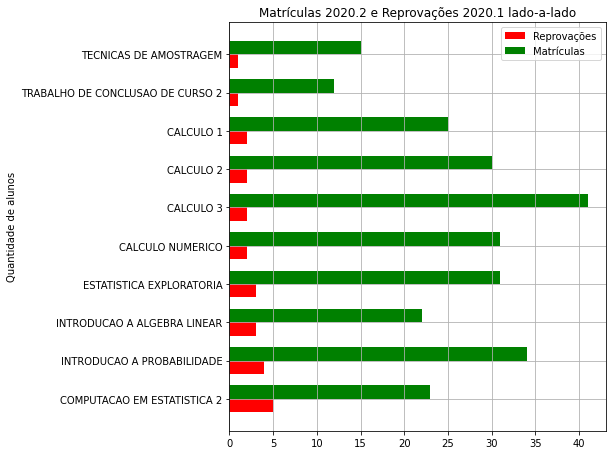

In [ ]:
#análise do semestre 2020.2 com base nas reprovações de 2020.1
#Top 10 matérias com maiores valores de reprovação de 2020.1
semestre_20201 = db[db.SEMESTRE == '20201']
semestre_est_20201 = semestre_20201[semestre_20201.CURSO == 'ESTATISTICA']
reprovados_est_20201 = semestre_est_20201[semestre_est_20201.APROVACAO == 'NAO']
reprovacao_por_disciplina = reprovados_est_20201.value_counts('DISCIPLINA')
cont_reprovacoes_20201 = reprovacao_por_disciplina.head(10)
a=cont_reprovacoes_20201.reset_index().values.tolist()
a_df = pd.DataFrame(a)
a_df.columns=['DISCIPLINA', 'QUANTIDADE']
df_reprovacoes = a_df

#Quantidade de matrículas nas matérias listadas acima no ano de 2020.2
semestre_20202 = db[db.SEMESTRE == '20202']
est_20202 = semestre_20202[semestre_20202.CURSO == 'ESTATISTICA']
cont_matriculas_20202 = est_20202.value_counts('DISCIPLINA')


#gráfico conjunto
labels = df_reprovacoes['DISCIPLINA'].values.tolist()
valor_reprovacoes = df_reprovacoes['QUANTIDADE'].values.tolist()
valor_matriculas = [23,34,22,31,31,41,30,25,12,15]

x = np.arange(len(labels))  # localização das legendas
width = 0.35  # grossura das barras

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, valor_reprovacoes, width, label='Reprovações', color='Red')
rects2 = ax.barh(x + width/2, valor_matriculas, width, label='Matrículas', color='Green')

# Adicionando textos e legendas e etc

ax.set_title('Matrículas 2020.2 e Reprovações 2020.1 lado-a-lado')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
ax.grid()

fig.tight_layout()
fig.set_size_inches(12, 7)
fig.savefig('grafico_17.png')
plt.show()
fig.clf()
#Fonte: UnB/Decanato de Graduação

### 8.Como a porcentagem de reprovação em Cálculo de Probabilidade 1 muda quando o aluno cursa a matéria ao mesmo tempo que cursa Cálculo 3? 

Variáveis de interesse: período, disciplina, menção, aluno 

Método: Localizar todos os alunos que cursaram CP1 e Cálculo 3 e fazer a análise de reprovação para alunos que fizeram as matérias conjuntamente e separadamente. Usar uma tabela com os valores das porcentagens de reprovação para comparação das possíveis diferenças da taxa de reprovação. 

In [ ]:
#Entradas de alunos de Estatística que cursaram Cálculo de Probabilidade 1 e Cálculo 3 no mesmo semestre. 
#Selecionando alunos de Estatística
alunos_est = db[db.CURSO == "ESTATISTICA"]

#Selecionando alunos que cursaram CP1 ou C3
c3 = alunos_est[alunos_est.DISCIPLINA == "CALCULO 3"]
cp1 = alunos_est[alunos_est.DISCIPLINA == "CALCULO DE PROBABILIDADE 1"]
c3_cp1 = pd.concat([c3, cp1], axis=0)

#para cada semestre, vamos ver se o aluno aparece duas vezes. Se sim, significa que ele cursou CP1 e C3
#ao mesmo tempo.

x=c3_cp1.value_counts('MATRICULA')
c3_cp1['CONTAGEM']=c3_cp1['MATRICULA'].map(x)

#Taxa de reprovação de C3 dentro da condição: 0,476
#Taxa de reprovação de CP1 dentro da condição: 0,351

In [ ]:
#Taxa geral de reprovação de Cálculo 3 entre os alunos de estatística
db_est = db[db.CURSO == 'ESTATISTICA']
x = 'CALCULO 3'
db_est_c3 = db_est[db_est.DISCIPLINA == x]
db_est_c3_rep = db_est_c3[db_est_c3.APROVACAO == 'NAO']
taxa_reprovacao_c3 = len(db_est_c3_rep)/len(db_est_c3)
print(taxa_reprovacao_c3)

#Taxa geral de reprovação de Cálculo 3 entre os alunos de estatística
db_est = db[db.CURSO == 'ESTATISTICA']
x = 'CALCULO DE PROBABILIDADE 1'
db_est_c3 = db_est[db_est.DISCIPLINA == x]
db_est_c3_rep = db_est_c3[db_est_c3.APROVACAO == 'NAO']
taxa_reprovacao_cp1 = len(db_est_c3_rep)/len(db_est_c3)
print(taxa_reprovacao_cp1)

#Taxa de reprovação geral de C3 entre alunos de Estatística: 0.375
#Taxa de reprovação geral de CP1 entre alunos de Estatística: 0.287

0.3748271092669433
0.2868085106382979


In [ ]:
#Tabela dos valores

df = pd.DataFrame({'Reprovação Simultânea' : [0.476, 0.351],
                   'Reprovação Separada' : [0.375, 0.287]})
print(tabulate(df, headers='keys', tablefmt='psql'))

#Fonte: UnB/Decanato de Graduação

+----+-------------------------+-----------------------+
|    |   Reprovação Simultânea |   Reprovação Separada |
|----+-------------------------+-----------------------|
|  0 |                   0.476 |                 0.375 |
|  1 |                   0.351 |                 0.287 |
+----+-------------------------+-----------------------+
